In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 178s 3us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

In [5]:
base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')

validation_dir = os.path.join(base_dir,'validation')

test_dir = os.path.join(base_dir,'test')

In [15]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
            directory,
            target_size=(150,150),
            batch_size =batch_size,
            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)

        features[(i*batch_size) : ((i + 1)*batch_size)] = features_batch
        labels[(i*batch_size) : ((i + 1)*batch_size)] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels

        

In [16]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

In [18]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(256, activation ='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [21]:
history = model.fit(
    train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4605 - acc: 0.7780 - val_loss: 0.3067 - val_acc: 0.8790
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2951 - acc: 0.8765 - val_loss: 0.2847 - val_acc: 0.8820
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2292 - acc: 0.9045 - val_loss: 0.2736 - val_acc: 0.8850
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2120 - acc: 0.9165 - val_loss: 0.2422 - val_acc: 0.9000
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1743 - acc: 0.9315 - val_loss: 0.2452 - val_acc: 0.8980
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1631 - acc: 0.9330 - val_loss: 0.2591 - val_acc: 0.8970
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1361 - acc: 0.9440 - val_loss: 0.2477 - val_acc: 0.8970
Epoch 8/30
200

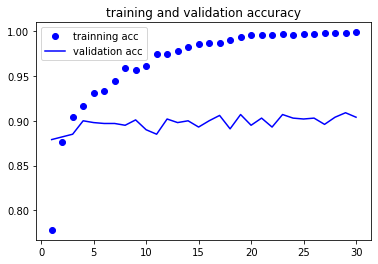

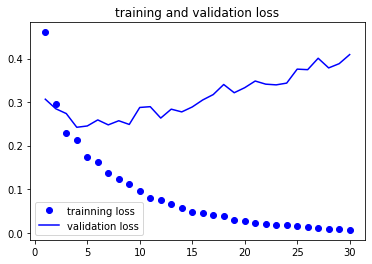

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='trainning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='trainning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()